In [1]:
%pylab inline
from math import factorial
import nba
from nba.ios import load_halo, load_snapshot
import itertools
from scipy.linalg import norm

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#
def delta_sph(l, b, k):
    mean_l = np.mean(l)
    mean_b = np.mean(b)
    
    for i in range(0, k):
        np.mean(l[i], l[i+1])

In [255]:
snapshot = "/mnt/home/nico/gadget_runs/isolated_MW/"
out_name = 'MWLMC5_100M_b0_vir_OM3_G4_000'
halo = load_halo(snapshot+out_name, 
                 N_halo_part=[100000000, 2000000], q=['pos', 'vel', 'mass'], com_frame=0, galaxy=0, 
                 snapformat=3, com_method='diskpot')

* Loading snapshot: /mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_000 
* Loading 'ParticleIDs' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_000.hdf5'
* Loading 'Coordinates' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_000.hdf5'
* Loading 'Velocities' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_000.hdf5'
* Loading 'Masses' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_000.hdf5'
* Loading halo 0 particle data
* Computing coordinates in halo 0 reference frame
* Loading 'Coordinates' of particles types 'PartType2' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_000.hdf5'
* Loading 'Velocities' of particles types 'PartType2' from snapshot: '/mnt/home/nico/gadget_runs/isolated

In [256]:
npart_rand = 10000


pos = halo['pos']
vel = halo['vel']
rand_cut = np.random.randint(0, len(pos), npart_rand)
halo_kin = nba.kinematics.Kinematics(pos[rand_cut], vel[rand_cut])


In [257]:
L = halo_kin.part_angular_momentum()

In [259]:
lorp, borp = halo_kin.orbpole()

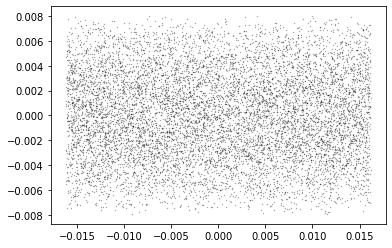

In [260]:
scatter(lorp/norm(np.array([lorp, borp])), borp/norm(np.array([lorp, borp])), s=0.1, c='k', alpha=0.5)

In [261]:
delta_sph = np.zeros((2000, 9))
delta_sph_std = np.zeros(9)
for n in range(2000):
    for k in range(3, 12):
        rand_int = np.random.randint(0, len(lorp), k)
        lorb3 = np.array(list(itertools.combinations(lorp[rand_int], k)))[0]
        borb3 = np.array(list(itertools.combinations(borp[rand_int], k)))[0]
        lorb_mean = np.mean(lorb3*np.pi/180)
        borb_mean = np.mean(borb3*np.pi/180)
        delta_sph_3 = np.zeros(len(lorb3))
        #print(len(lorb3))
        for p in range(len(lorb3)):
            mean_vec = np.array([lorb_mean, borb_mean])/norm([lorb_mean, borb_mean])
            all_vec =  np.array([lorb3[p], borb3[p]])/norm(np.array([lorb3[p], borb3[p]]))
            #delta_sph_3[p] = np.sqrt(180/np.pi*np.sum(np.arccos(np.dot(mean_vec, all_vec))**2)/k)
            delta_sph_3[p] = np.arccos(norm(np.dot(mean_vec.T, all_vec)))*180/np.pi

        delta_sph[n, k-3] = np.sqrt(np.sum(delta_sph_3**2, axis=0)/k)
    #delta_sph_mean
    #print('---')
    #delta_sph_std[k-2] = np.std(delta_sph_3)

/tmp/ipykernel_2767538/1560617646.py:16: RuntimeWarning: invalid value encountered in arccos
  delta_sph_3[p] = np.arccos(norm(np.dot(mean_vec.T, all_vec)))*180/np.pi


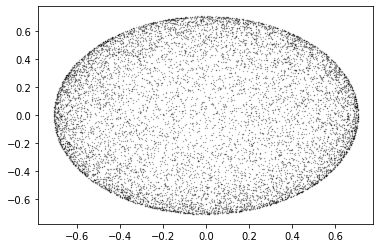

In [262]:
scatter(pos_r.T[:,0], pos_r.T[:,1], s=0.1, c='k', alpha=0.5)

In [267]:
norm(L, axis=0)

array([ 47537.457 ,   3175.0244,  32104.35  , ...,  13761.993 ,
         7947.89  , 109755.54  ], dtype=float32)

In [264]:
pos_r = L / norm(L, axis=0)
delta_sph = np.zeros((10000, 9))
delta_sph_std = np.zeros(9)
for n in range(10000):
    for k in range(3, 12):
        rand_int = np.random.randint(0, npart_rand, k)
        x3 = np.array(list(itertools.combinations(pos_r.T[:,0][rand_int], k)))[0]
        y3 = np.array(list(itertools.combinations(pos_r.T[:,1][rand_int], k)))[0]
        z3 = np.array(list(itertools.combinations(pos_r.T[:,2][rand_int], k)))[0]

        x_mean = np.mean(x3)
        y_mean = np.mean(y3)
        z_mean = np.mean(z3)

        delta_sph_3 = np.zeros(len(x3))
        #print(len(lorb3))
        for p in range(len(x3)):
            mean_vec = np.array([x_mean, y_mean, z_mean])
            all_vec =  np.array([x3[p], y3[p], z3[p]])
            #delta_sph_3[p] = np.sqrt(180/np.pi*np.sum(np.arccos(np.dot(mean_vec, all_vec))**2)/k)
            delta_sph_3[p] = np.arccos(norm(np.dot(mean_vec, all_vec)))*180/np.pi

        delta_sph[n, k-3] = np.sqrt(np.sum(delta_sph_3**2, axis=0)/k)
    #delta_sph_mean
    #print('---')
    #delta_sph_std[k-2] = np.std(delta_sph_3)

(array([  87.,  258.,  399.,  609.,  833., 1118., 1665., 2621., 1845.,
         565.]),
 array([60.42239561, 63.36695487, 66.31151413, 69.25607338, 72.20063264,
        75.1451919 , 78.08975116, 81.03431041, 83.97886967, 86.92342893,
        89.86798819]),
 <BarContainer object of 10 artists>)

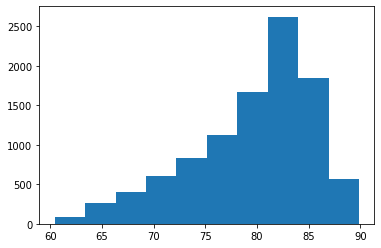

In [269]:
hist(delta_sph[:,0])

Text(0, 0.5, '$\\Delta_{sph}$')

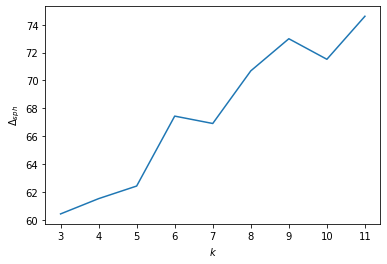

In [270]:
plot(np.arange(3, 12), np.nanmin(delta_sph, axis=0))
plt.xlabel('$k$')
plt.ylabel('$\Delta_{sph}$')